In [2]:
import numpy as np
import pandas as pd
from numba import njit, jit, int64, uint64
import time
import sys

sys.setrecursionlimit(10 ** 9)
# pd.options.display.float_format = '{:20,.2f}'.format

In [6]:
a = [1, 1, 1, 1, 4, 5, 6]
a.count(1)

4

In [324]:
def quicksort(arr, index_pivot=0):
    global k
    k += 2
    if len(arr) <= 1:
        return arr
    
    else:
        pivot = arr[index_pivot]
        less = []
        high = []
        k += 4
        for i in arr[0: index_pivot]:
            k += 2
            if i <= pivot:
                less.append(i)
                k += 1
            else:
                high.append(i)
                k += 1
        for i in arr[index_pivot + 1 :]:
            k += 2
            if i <= pivot:
                less.append(i)
                k += 1
            else:
                high.append(i)
                k += 1
        k += 2
        if len(less) > 0:
            pivot_less = np.random.randint(0, len(less), 1)[0]
            k += 2
        else:
            pivot_less = 0
            k += 1
        k += 2
        if len(high) > 0:
            pivot_high = np.random.randint(0, len(high), 1)[0]
            k += 2
        else:
            pivot_high = 0
            k += 1
        return quicksort(less, index_pivot=pivot_less) + [pivot] + quicksort(high, index_pivot=pivot_high)

In [325]:
def quicksort_max(arr, index_pivot=0):
    global k
    index_pivot = np.where(arr == arr.max())[0][0]

    k += 2
    if len(arr) <= 1:
        return arr    
    else:
        pivot = arr[index_pivot]
        less = np.array([])
        high = np.array([])
        k += 4
        for i in arr[0: index_pivot]:
            k += 2
            if i <= pivot:
                less = np.append(less, i)
                k += 1
            else:
                high = np.append(high, i)
                k += 1
        for i in arr[index_pivot + 1 :]:
            k += 2
            if i <= pivot:
                less = np.append(less, i)
                k += 1
            else:
                high = np.append(high, i)
                k += 1
        k += 2
        if len(less) > 0:
            pivot_less = np.where(less == less.max())[0][0]
            k += 2
        else:
            pivot_less = 0
            k += 1
        k += 2
        if len(high) > 0:
            pivot_high = np.where(high == high.max())[0][0]
            k += 2
        else:
            pivot_high = 0
            k += 1
        return np.concatenate([quicksort(less, index_pivot=pivot_less), [pivot], quicksort(high, index_pivot=pivot_high)])

In [326]:
table_quicksort = pd.DataFrame([])

In [328]:
for i in range(100000, 1000001, 100000):
    k = 0
    my_list = np.random.randint(0, 10000, i)
    my_list_s = np.sort(my_list)
    index_pivot = np.random.randint(0, i, 1)[0]
    s = time.time()
    my_list = quicksort(my_list, index_pivot=index_pivot)
    f = time.time()
    print(np.allclose(my_list, my_list_s))
    table_quicksort.loc[i, ['k', 'Time']] = [k, f - s]

True
True
True
True
True
True
True
True
True
True


In [332]:
for i in range(100000, 1000001, 100000):
    k = 0
    my_list = np.random.randint(0, 10000, i)
    my_list = np.sort(my_list)
    my_list_s = my_list.copy()
    my_list_s[0] = -0.5
    my_list_s[-1] = 10001.5 
    my_list[0] = 10001.5
    my_list[-1] = -0.5

    index_pivot = np.random.randint(0, i, 1)[0]
    s = time.time()
    my_list = quicksort(my_list, index_pivot=index_pivot)
    f = time.time()
    print(np.allclose(my_list, my_list_s))
    table_quicksort.loc[i, ['k_MIN', 'Time_MIN']] = [k, f - s]

True
True
True
True
True
True
True
True
True
True


In [362]:
for i in range(100000, 1000001, 100000):
    k = 0
    my_list = np.random.uniform(0, 10000, i)
    my_list_s = np.sort(my_list)
    index_pivot = np.where(my_list == my_list.max())
    s = time.time()
    my_list = quicksort_max(my_list, index_pivot=index_pivot)
    f = time.time()
    print(np.allclose(my_list, my_list_s))
    table_quicksort.loc[i, ['k_MAX', 'Time_MAX']] = [k, f - s]

True
True
True
True
True
True
True
True
True
True


<Axes: >

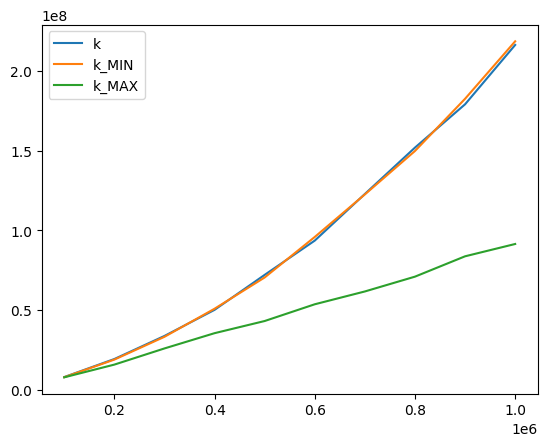

In [366]:
table_quicksort[['k', 'k_MIN', 'k_MAX']].plot()

<Axes: >

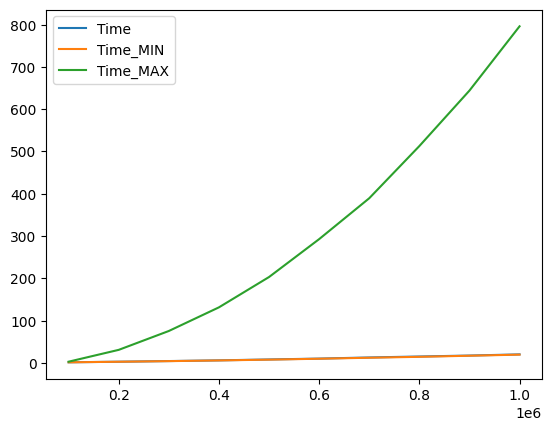

In [364]:
table_quicksort[['Time', 'Time_MIN', 'Time_MAX']].plot()

<Axes: >

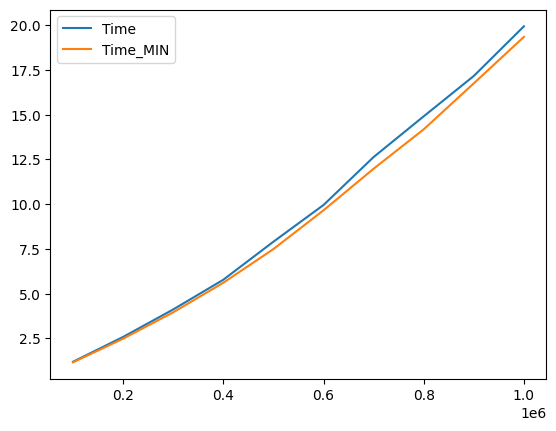

In [373]:
table_quicksort[['Time', 'Time_MIN']].plot()

In [307]:
def combsort(arr, coeff=1.3):
    step = len(arr)
    indicator = True
    k = 3
    k += 2
    while step > 1 or indicator:
        step = max((1 , int(step / coeff)))
        indicator = False
        k += 4
        k += 2
        for i in range(len(arr) - step):
            k += 2
            if arr[i] > arr[i + step]:
                arr[i], arr[i + step] = arr[i + step], arr[i]
                indicator = True
                k += 5

    return arr, k

In [308]:
table_combsort = pd.DataFrame([])

In [309]:
for i in range(100000, 1000001, 100000):
    my_list = np.random.randint(0, 10000, i)
    my_list_s = np.sort(my_list)
    s = time.time()
    my_listk, k = combsort(my_list)
    f = time.time()
    table_combsort.loc[i, ['k', 'Time']] = [k, f - s]
    print(np.allclose(my_list, my_list_s))

True
True
True
True
True
True
True
True
True
True


In [381]:
for i in range(100000, 1000001, 100000):
    my_list = np.random.randint(0, 10000, i)
    my_list_s = np.sort(my_list)
    s = time.time()
    my_listk, k = combsort(my_list, coeff=1.2)
    f = time.time()
    table_combsort.loc[i, ['k_coeff_s', 'Time_coeff_s']] = [k, f - s]
    print(np.allclose(my_list, my_list_s))

True
True
True
True
True
True
True
True
True
True


In [336]:
for i in range(100000, 1000001, 100000):
    my_list = np.random.randint(0, 10000, i)
    my_list = np.sort(my_list)
    my_list_s = my_list.copy()
    my_list[-1], my_list[0] = -1, 10001
    my_list_s[-1], my_list_s[0] = 10001, -1
    s = time.time()
    my_listk, k = combsort(my_list)
    f = time.time()
    table_combsort.loc[i, ['k_min', 'Time_min']] = [k, f - s]
    print(np.allclose(my_list, my_list_s))

True
True
True
True
True
True
True
True
True
True


In [359]:
for i in range(100000, 1000001, 100000):
    my_list = np.arange(i, 0, -1)
    my_list_s = my_list.copy()
    my_list_s = np.sort(my_list)
    s = time.time()
    my_listk, k = combsort(my_list)
    f = time.time()
    table_combsort.loc[i, ['k_max', 'Time_max']] = [k, f - s]
    print(np.allclose(my_list, my_list_s))

True
True
True
True
True
True
True
True
True
True


In [374]:
for i in range(100000, 1000001, 100000):
    my_list = np.arange(i, 0, -1)
    my_list_s = my_list.copy()
    my_list_s = np.sort(my_list)
    s = time.time()
    my_listk, k = combsort(my_list, coeff=1.5)
    f = time.time()
    table_combsort.loc[i, ['k_max_coeff', 'Time_max_coeff']] = [k, f - s]
    print(np.allclose(my_list, my_list_s))

True
True
True
True
True
True
True
True
True
True


<Axes: >

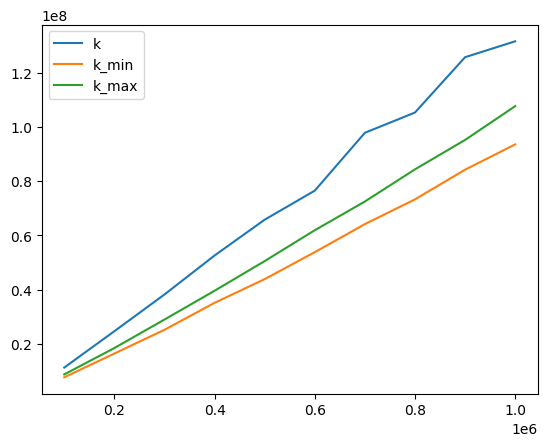

In [369]:
table_combsort[['k', 'k_min', 'k_max']].plot()

<Axes: >

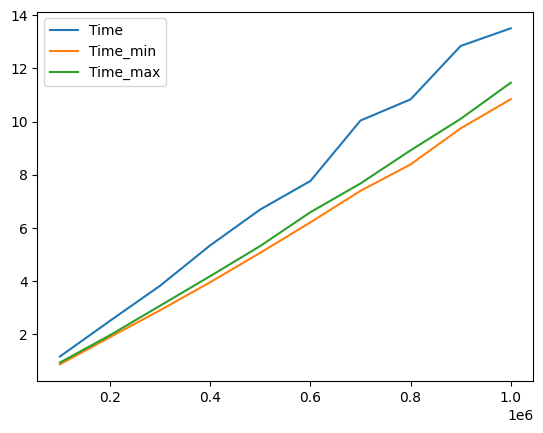

In [367]:
table_combsort[['Time', 'Time_min', 'Time_max']].plot()

In [383]:
table_combsort.columns

Index(['k', 'Time', 'k_min', 'Time_min', 'k_max', 'Time_max', 'k_max_coeff',
       'Time_max_coeff', 'k_coeff_s', 'Time_coeff_s'],
      dtype='object')

<Axes: >

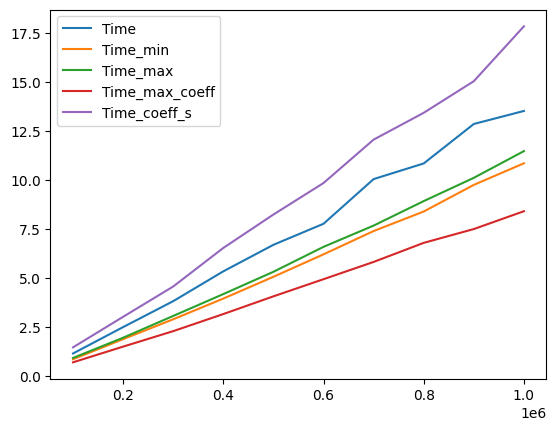

In [384]:
table_combsort[['Time', 'Time_min', 'Time_max', 'Time_max_coeff', 'Time_coeff_s']].plot()